## 💻 OpenCV를 이용한 물체 검출

### Haar 직렬형 분류기
※ 직렬형 분류기 Chapter 03. 물체 검출 참고
Haar 직렬형 분류기는 초기 특징 추출 알고리즘 중 하나이다.  
알고리즘의 기본 전제: 모든 얼굴에 존재하는 고유한 구조 적용
#### 적분 이미지(Summed Area Table)
이미지를 저장하는 또 다른 형태, 보통 계산을 줄이기 위해 사용된다.

In [7]:
import cv2
from skimage import io

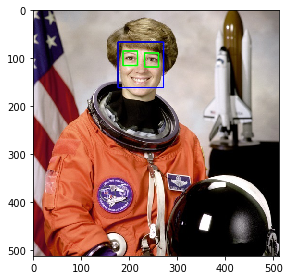

In [3]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml") #직렬형 분류기
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
img = cv2.imread("image.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(img_gray,1.3,5) #얼굴 먼저 검출 후
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h),(255,0,0),2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)     #얼굴 영역 내에서 눈 검출
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh),(0,255,0),2)
        
cv2.imwrite("output.jpg", img)
io.imshow("output.jpg")

### SIFT(Scale Invariant Feature Transformation)
기본적으로 ORB 알고리즘과 유사하다
* 물체 크기, 회전 방향에 영향을 받지 않는다
* 시점, 조명에 부분적으로 영향을 받지 않는다
* 하나의 이미지에서 다수의 키포인트를 추출할 수 있다.

※자세한 설명은 책 170.p 참고  
크기 공간의 극한값 검출 by Laplacian & Gaussian + Octave → 키포인트 위치시키기 → 방향 할당(for 회전 불변성) → 키포인트 설명자

In [13]:
import cv2

In [10]:
image = cv2.imread("image.jpg")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
sift_obj = cv2.xfeatures2d.SIFT_create() #3.3.0.10 ver. 3.4.2.16 ver. 현재는 설치 불가
keypoints = sift_obj.detect(gray,None)
img = cv2.drawKeypoints(gray, keypoints, image)
cv2.imwrite("sift_keypoints.jpg",image)
io.imshow("sift_keypoints.jpg")

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [ ]:
import random
image = cv2.imread("image.jpg")
image-rot = cv2.imread("image_rot.jpg")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_rot = cv2.cvtColor(image_rot, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp, desc = sift.detectAndCompute(gray,None)
kp_rot, desc_rot = soft.detectAndCompute(gray_rot, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc, desc_rot, k=2)
good = []
for m,n in matches:
    if m.distance < 0.4 * n.distance:
        good.append([m])
random.shuffle(good)
image_match = cv2.drawMatchesKnn(image, kp, image_rot, kp_rot, good[:10], flags=2, outImg=None)
cv2.imwrite("sift_matches.jpg",image_match)

### SURF (Speeded-Up Robust Features)
* 빠른 관심 지점 검출
* 구분되는 관심 지점 설명자
* 설명자 대응 속도 향상

※자세한 설명은 책 182.p 참고 

In [1]:
import cv2
import random

In [3]:
image = cv2.imread("image.jpg")
image_rot = cv2.imread("image_rot.jpg")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_rot = cv2.cvtColor(image_rot, cv2.COLOR_BGR2GRAY)
surf = cv2.xfeatures2d.SURF_create()
kp, desc = surf.detectAndCompute(gray, None)
kp_rot, desc_rot = surf.deteectAndCompute(gray_rot,None)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-71670poj\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc, desc_rot,k=2)
good = []
for m,n in matches:
    if m,distacne < 0.4*n.distance:
        good.append([m])
random.shuffle(good)
image_match = cv2.drawMatchesKnn(image,kp,image_rot,kp_rot, good[:10],flags=2,outImg=None)
cv2.imwrite("surf_matches.jpg",image_match)